In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [77]:
URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv"

df = pd.read_csv(URL, index_col=0)

In [78]:
from sklearn.cluster import KMeans

X = df[["Age", "Spending Score (1-100)"]].reset_index(drop=True)

In [79]:
ss = StandardScaler()
X = ss.fit_transform(X)

X = pd.DataFrame(X, columns=["Age", "Spending Score (1-100)"])

In [80]:
kmeans_models = {}

for k in range(1, 10):

    kmeans = KMeans(n_clusters=k, init="k-means++").fit(X)

    kmeans_models[k] = kmeans

In [81]:
plt.plot(kmeans_models.keys(), [k.inertia_ for k in kmeans_models.values()], marker='o', markersize=2)

plt.axvline(x=4, color='lightblue', linestyle='-', marker='o', markersize=2, label="Best K")

plt.xlabel("Numero di cluster")
plt.ylabel("Inertia")

best_k = 4

plt.show()

<IPython.core.display.Javascript object>

In [82]:
clusters = {0: "Giovani Spendaccioni", 1: "Giovani Saver", 2: "Adulti Spandaccioni", 3: "Adulti Saver", 4: "Anziani Spandaccioni", 5: "Anziani Saver", 6: "Anziani Spandaccioni", 7: "Anziani Saver"}

vfunc = np.vectorize(lambda x: clusters[x])

plt.figure(figsize=(15, 8))

sns.scatterplot(data=X, x="Age", y="Spending Score (1-100)", hue=kmeans_models[best_k].labels_, palette="viridis")
sns.scatterplot(x=kmeans_models[best_k].cluster_centers_[:,0], y=kmeans_models[best_k].cluster_centers_[:,1], color="red", s=50, marker="o", alpha=0.7, label="Centroidi")

plt.legend(title="Clusters", labels=vfunc(np.arange(best_k)))

plt.show()

<IPython.core.display.Javascript object>

In [83]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].reset_index(drop=True)

In [84]:
ss = StandardScaler()
X = ss.fit_transform(X)

X = pd.DataFrame(X, columns=df.columns[1:])

In [85]:
kmeans_models = {}

for k in range(1, 10):

    kmeans = KMeans(n_clusters=k, init="k-means++").fit(X)

    kmeans_models[k] = kmeans

In [86]:
plt.plot(kmeans_models.keys(), [k.inertia_ for k in kmeans_models.values()], marker='o', markersize=2)

plt.axvline(x=4, color='lightblue', linestyle='-', marker='o', markersize=2, label="Best K")

plt.xlabel("Numero di cluster")
plt.ylabel("Inertia")

best_k = 4

plt.show()

<IPython.core.display.Javascript object>

In [96]:
%matplotlib inline

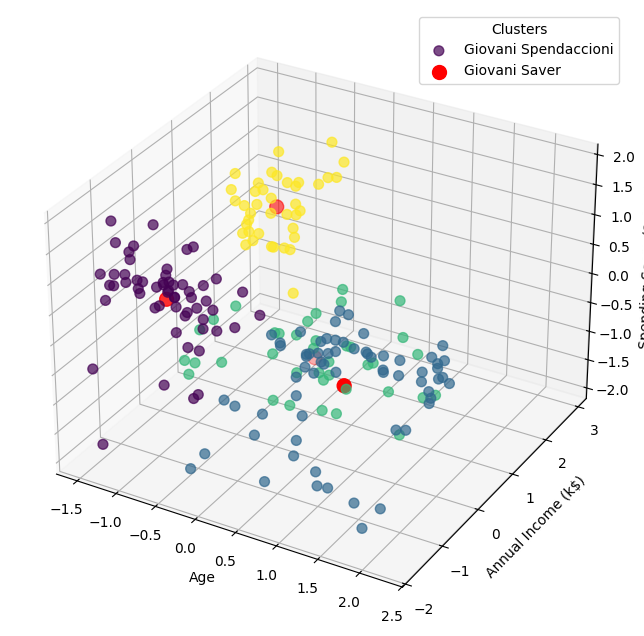

In [97]:
#3d plot

from mpl_toolkits.mplot3d import Axes3D

clusters = {0: "Giovani Spendaccioni", 1: "Giovani Saver", 2: "Adulti Spandaccioni", 3: "Adulti Saver", 4: "Anziani Spandaccioni", 5: "Anziani Saver", 6: "Anziani Spandaccioni", 7: "Anziani Saver"}

vfunc = np.vectorize(lambda x: clusters[x])

fig = plt.figure(figsize=(15, 8))

# Crea un grafico 3D
ax = fig.add_subplot(111, projection='3d')

# Scatterplot dei dati
scatter = ax.scatter(
    X["Age"], 
    X["Annual Income (k$)"], 
    X["Spending Score (1-100)"], 
    c=kmeans_models[best_k].labels_, 
    cmap="viridis", 
    s=50, 
    alpha=0.7
)

# Scatterplot dei centroidi
ax.scatter(
    kmeans_models[best_k].cluster_centers_[:, 0], 
    kmeans_models[best_k].cluster_centers_[:, 1], 
    kmeans_models[best_k].cluster_centers_[:, 2], 
    color="red", 
    s=100, 
    marker="o", 
    label="Centroidi"
)

# Aggiungi etichette agli assi
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Aggiungi legenda
legend_labels = [clusters[i] for i in range(best_k)]
legend = ax.legend(title="Clusters", labels=legend_labels)

plt.show()

In [ ]:
CSV_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers_predict.csv"

y = pd.read_csv(CSV_URL, index_col=0)

In [ ]:
X = ss.transform(X)

In [ ]:
y = y.drop("Gender", axis=1).reset_index(drop=True)

y_pred = kmeans_models[best_k].predict(y)

y_pred

In [ ]:
df_result = pd.DataFrame(
    {
        "Age": y["Age"],
        "Annual Income (k$)": y["Annual Income (k$)"],
        "Spending Score (1-100)": y["Spending Score (1-100)"],
        "Cluster": y_pred
    }
)

df_result.to_csv("mall_customers_predict.csv")